In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from sodapy import Socrata
from pygeocoder import Geocoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
unique_df = pd.read_csv("../data/unique_austin_shelter.csv")

In [3]:
unique_df.set_index("animal_id", inplace=True)

In [4]:
unique_df.columns

Index(['breed', 'color', 'date_in', 'found_location', 'intake_condition',
       'intake_type', 'name', 'sex', 'fixed', 'date_of_birth', 'date_out',
       'outcome_subtype', 'outcome_type', 'in_shelter', 'time_in_shelter',
       'age_in', 'age_out'],
      dtype='object')

#### Average time in shelter

In [5]:
(unique_df.date_out.apply(pd.to_datetime) - unique_df.date_in.apply(pd.to_datetime)).mean()

Timedelta('15 days 12:19:40.914530')

#### Most common dog name

In [6]:
unique_df.name.value_counts().head()

Bella    269
Max      256
Daisy    203
Luna     193
Rocky    188
Name: name, dtype: int64

#### How many dogs don't have names

In [7]:
unique_df.name.isnull().value_counts()

False    31823
True      8207
Name: name, dtype: int64

#### Number of dogs adopted per outcome type

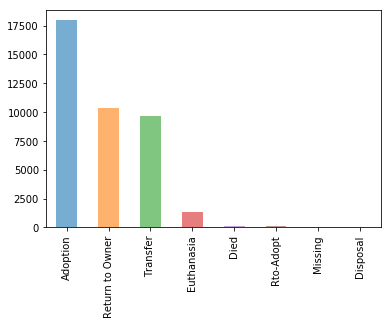

In [8]:
unique_df.outcome_type.value_counts().plot.bar(alpha=0.6)

In [9]:
unique_df.outcome_type.value_counts()

Adoption           17951
Return to Owner    10323
Transfer            9631
Euthanasia          1348
Died                 166
Rto-Adopt            160
Missing               12
Disposal              12
Name: outcome_type, dtype: int64

#### Does intake conditon affect outcome?

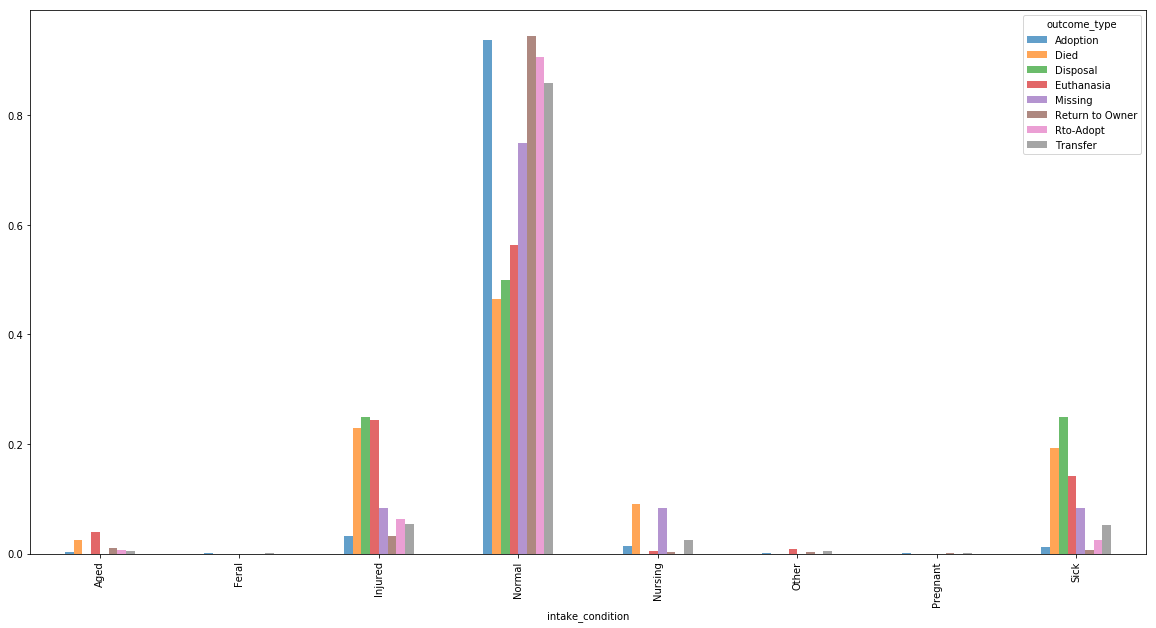

In [10]:
counts = pd.crosstab(unique_df.intake_condition, unique_df.outcome_type)
(counts / counts.sum()).plot.bar(figsize=(20,10), alpha=0.7)

#### If injured/sick dogs are more likely to be euthanized compared to normal dogs

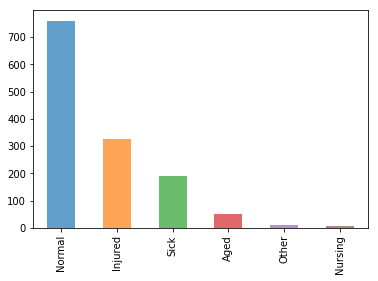

In [11]:
unique_df.loc[unique_df.outcome_type == "Euthanasia"].intake_condition.value_counts().plot.bar(alpha=0.7)

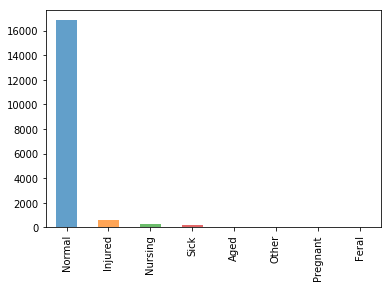

In [12]:
unique_df.loc[unique_df.outcome_type == "Adoption"].intake_condition.value_counts().plot.bar(alpha=0.7)

#### Does the outcome of a dog change based on gender?

In [13]:
counts = pd.crosstab(unique_df.outcome_type, unique_df.sex)

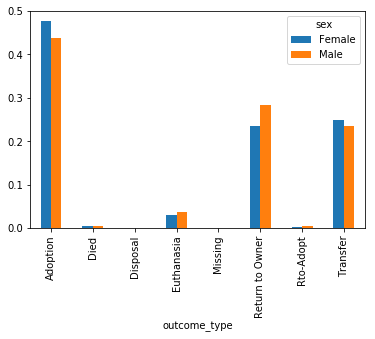

In [14]:
(counts / counts.sum()).plot.bar()

#### What is the most common abandoned dog breed?

In [15]:
unique_df.breed.value_counts()[:10]

Pit Bull Mix                 4705
Chihuahua Shorthair Mix      4644
Labrador Retriever Mix       4237
German Shepherd Mix          1781
Australian Cattle Dog Mix     954
Dachshund Mix                 773
Miniature Poodle Mix          582
Border Collie Mix             573
Boxer Mix                     560
Yorkshire Terrier Mix         476
Name: breed, dtype: int64

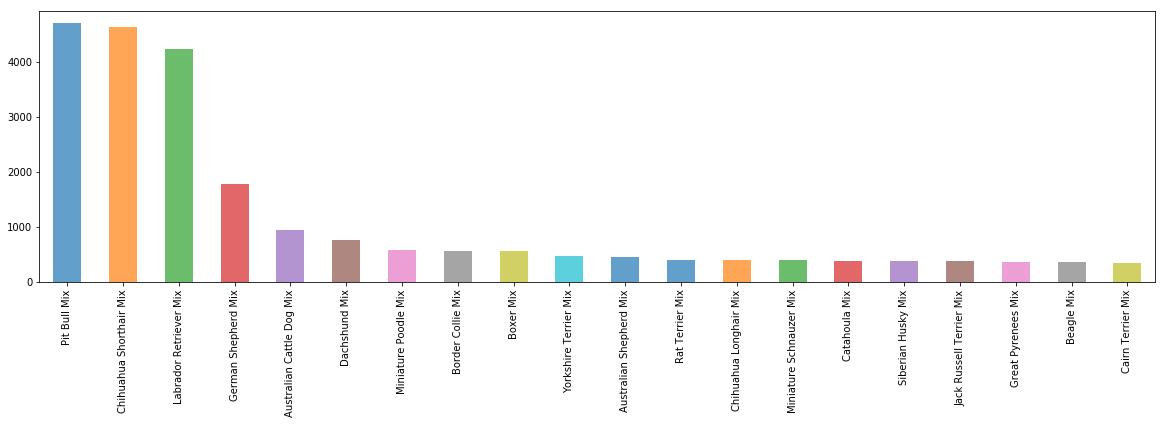

In [16]:
unique_df.breed.value_counts()[:20].plot.bar(figsize=(20,5), alpha=0.7)

#### What is the most common adopted dog breed?
*normalie??*

In [17]:
unique_df.loc[(unique_df.in_shelter == "No") 
              & (unique_df.outcome_type=="Adoption")].breed.value_counts()[:10]

Chihuahua Shorthair Mix      2148
Labrador Retriever Mix       2134
Pit Bull Mix                 1726
German Shepherd Mix           857
Australian Cattle Dog Mix     510
Dachshund Mix                 360
Border Collie Mix             317
Boxer Mix                     244
Miniature Poodle Mix          236
Australian Shepherd Mix       225
Name: breed, dtype: int64

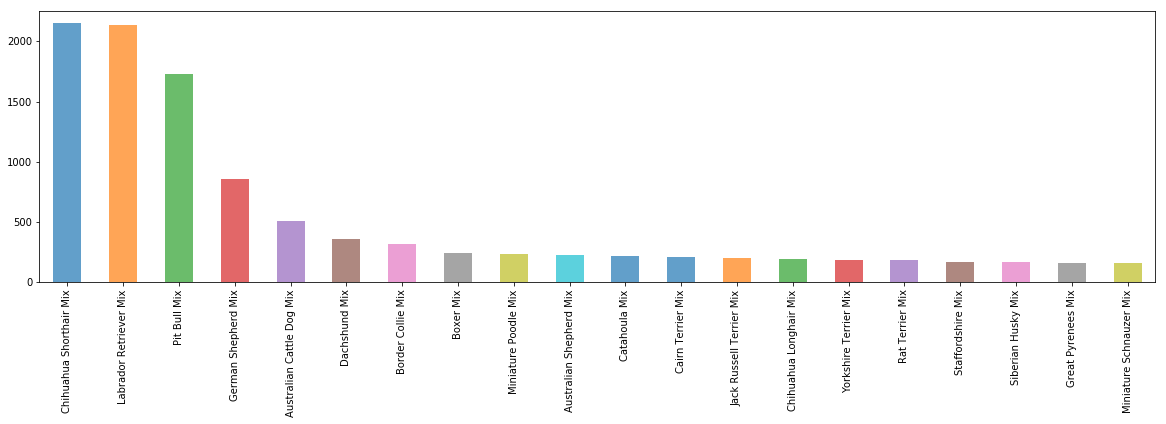

In [18]:
unique_df.loc[(unique_df.in_shelter == "No") 
              & (unique_df.outcome_type=="Adoption")].breed.value_counts()[:20].plot.bar(figsize=(20,5), alpha=0.7)

#### Most common time a dog is admitted

In [19]:
unique_df.date_in = unique_df.date_in.apply(pd.to_datetime)

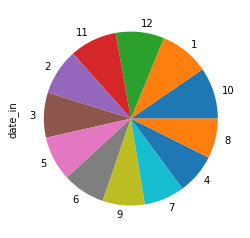

In [20]:
unique_df.date_in.apply(lambda x: x.month).value_counts().plot.pie()

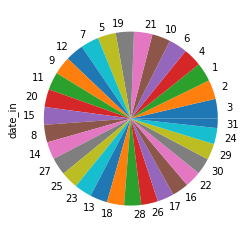

In [21]:
unique_df.date_in.apply(lambda x: x.day).value_counts().plot.pie()

#### Most common time a dog is adopted

In [22]:
unique_df.date_out = unique_df.date_out.apply(pd.to_datetime)

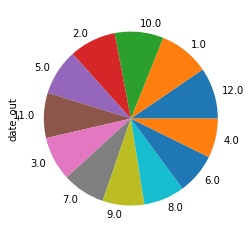

In [23]:
unique_df.date_out.apply(lambda x: x.month).value_counts().plot.pie()

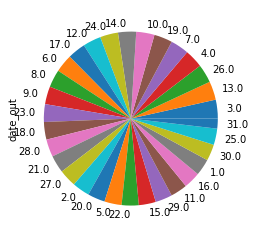

In [24]:
unique_df.date_out.apply(lambda x: x.day).value_counts().plot.pie()

#### Most common age of admitted dogs

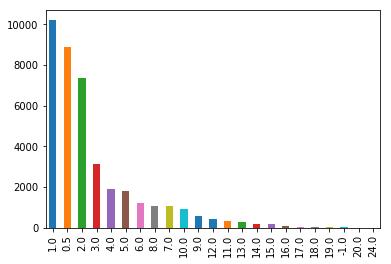

In [34]:
unique_df.age_in.value_counts().plot.bar()

#### Most common age of adopted dogs

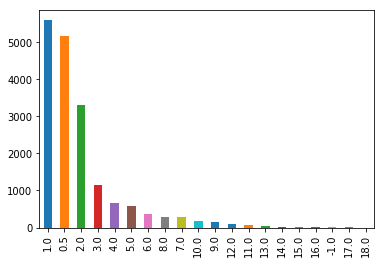

In [35]:
unique_df.loc[unique_df.outcome_type == "Adoption"]['age_out'].value_counts().plot.bar()

#### What is the best age to abandon your dog to ensure that it will be better adopted?



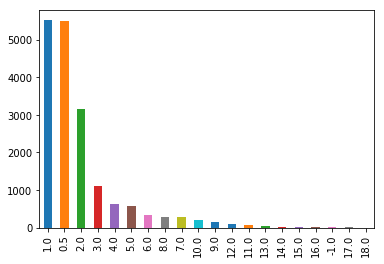

In [37]:
unique_df.loc[unique_df.outcome_type == "Adoption"]['age_in'].value_counts().plot.bar()

In [38]:
unique_df

breed  \
animal_id                                             
A786884                                  Beagle Mix   
A706918                    English Springer Spaniel   
A724273                                 Basenji Mix   
A778404                         German Shepherd Mix   
A682524       Doberman Pinsch/Australian Cattle Dog   
A743852                      Labrador Retriever Mix   
A708452                      Labrador Retriever Mix   
A760053                         Chihuahua Shorthair   
A707375                                    Pit Bull   
A696408                         Chihuahua Shorthair   
A697950    Australian Cattle Dog/Labrador Retriever   
A298074                  Parson Russell Terrier Mix   
A769764                       Yorkshire Terrier Mix   
A682230                                 Maltese Mix   
A749436                               Dachshund Mix   
A759935                      Labrador Retriever Mix   
A666877                               Dachshund Mix   
A732903                      Labrador Retriever Mix   
A769816                             Plott Hound Mix   
A724378                         Tibetan Spaniel Mix   
A745133                     Chihuahua Shorthair Mix   
A721791               Dachshund/Chihuahua Shorthair   
A675555                   German Shepherd/Chow Chow   
A747964                     Miniature Schnauzer Mix   
A787254                         Black Mouth Cur Mix   
A710890                          Great Pyrenees Mix   
A683884                         German Shepherd Mix   
A676263                                Pit Bull Mix   
A736719                      Labrador Retriever Mix   
A770028               American Pit Bull Terrier Mix   
...                                             ...   
A790425                     Chihuahua Shorthair Mix   
A761683                              Siberian Husky   
A790422                              Siberian Husky   
A790198                               Dachshund Mix   
A790407                              Cocker Spaniel   
A790424                           Staffordshire Mix   
A790420                      Labrador Retriever Mix   
A790280                    Jack Russell Terrier Mix   
A790367                        Belgian Tervuren Mix   
A790397                         Australian Shepherd   
A789484                 Miniature Poodle/Lhasa Apso   
A789444                                   Boxer Mix   
A790432                   Australian Cattle Dog Mix   
A790431          Jack Russell Terrier/Border Collie   
A790430                               Dachshund Mix   
A790279                           Cairn Terrier Mix   
A790218                      Labrador Retriever Mix   
A790426                     Miniature Schnauzer Mix   
A790387                                      Beagle   
A790247              Anatol Shepherd/Great Pyrenees   
A790439                                   Boxer Mix   
A790463                           West Highland Mix   
A790435    Labrador Retriever/Australian Cattle Dog   
A788004                      Labrador Retriever Mix   
A790445                           Staffordshire Mix   
A789901             German Shepherd/Doberman Pinsch   
A790070                         German Shepherd Mix   
A788592                                   Boxer Mix   
A790216                                Pit Bull Mix   
A790182                            Pit Bull/Pointer   

                                color             date_in  \
animal_id                                                   
A786884                  ['Tricolor'] 2019-01-03 16:19:00   
A706918            ['White', 'Liver'] 2015-07-05 12:59:00   
A724273            ['Sable', 'White'] 2016-04-14 18:43:00   
A778404              ['Black', 'Tan'] 2018-08-14 10:19:00   
A682524               ['Tan', 'Gray'] 2014-06-29 10:38:00   
A743852                 ['Chocolate'] 2017-02-18 12:46:00   
A708452            ['Black', 'White'] 2015-07-30 14:37:00   
A760053              ['White', 